# Решающие деревья

Сегодня мы переходим к изучению нового класса алгоритмов машинного обучения, которые способны решать как задачу классификации, так и задачу регрессии.

Мы уже изучили с вами метрические и линейные алгоритмы, сегодня же мы изучим один из самых знаковых типов алгоритмов - решающие дерервья.

# Интуиция

Часто при решении различных задач машинного обучения приходится сталкиваться с задачей принятия решений на основании последовательных ответов на заданные вопросы. Давайте рассмотрим реальный пример, где встречается подобная задача.

###Прием у врача
Классическим примером подобной задачи является врачебная диагностика различных заболеваний. Когда пациент приходит к врачу с жалобой на кашель, доктор проводит его осмотр, отвечая при этом на следующие вопросы:

1. Как давно кашель?
2. Есть ли температура?
3. Заложен ли нос?
4. Как прослушиваются легкие, бронхи?
5. Каков сердечный ритм пациента?
6. Возраст, наличие флюорограммы, др. факторы?

Исходя из ответов на эти вопросы доктор осуществляет постановку диагноза пациенту.

Обратите внимание, что врачу достаточно задать лишь небольшое количество вопросов, а не все возможные вопросы о вашем состоянии, а также ему не нужно перечитывать весь медицинский справочник. Ваш ответ на каждый из вопросов врача сужает количество возможных вердиктов, пока не останется всего один, и это происходит довольно быстро (5-6 вопросов).

Именно такая логика заложена в структуре решающего дерева.




# Структура модели

Решающее дерево представляет собой так называемый **граф**, то есть последовательность некоторых вершин, соединенных ребрами. Можно представить решающее дерево как аналог блок-схем, которые рассматривались в школе на уроках информатики.


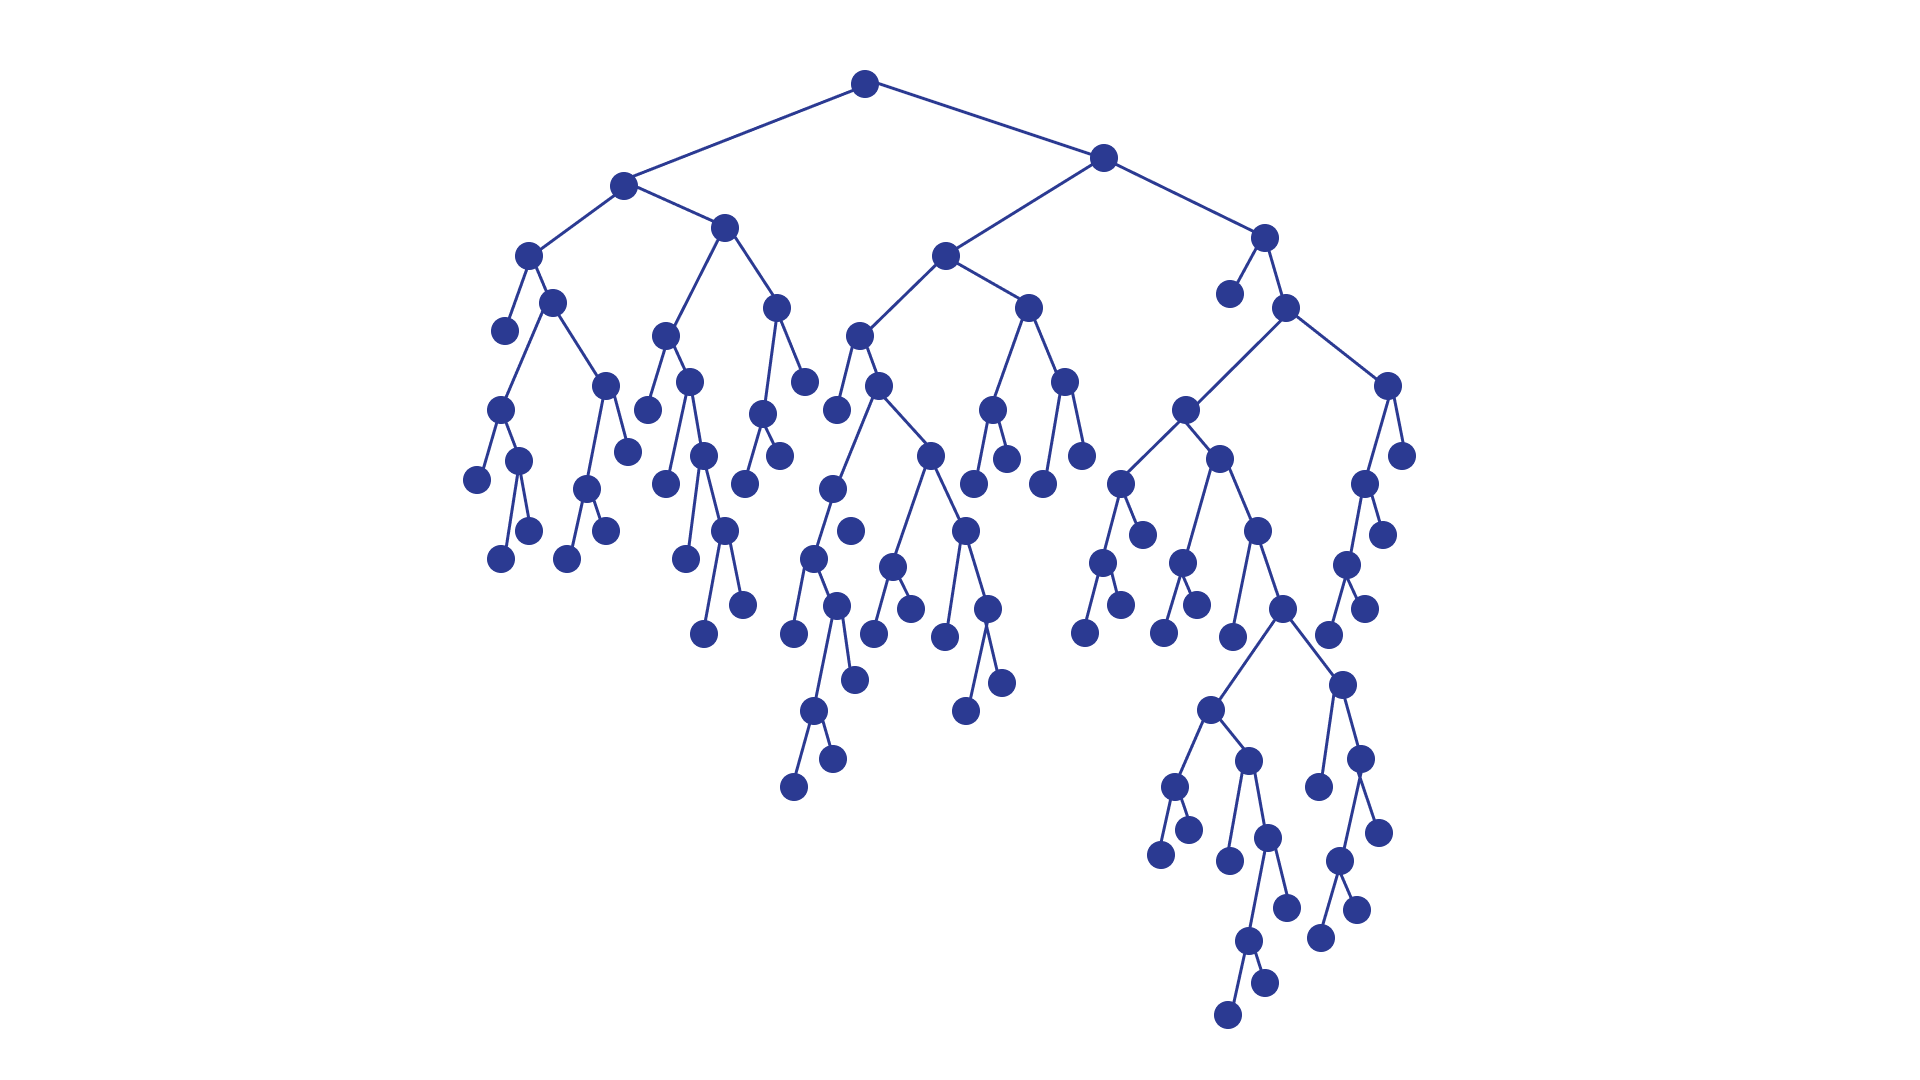



Все вершины дерева делятся на **листовые** и **внутренние**. Работа дерева сводится к последовательному перемещению по этим вершинам вдоль ребер по следующему принципу.

На вход дерева подается некоторый объект, представленный вектором своего признакового описания. В каждой внутренней вершине для исходного объекта вычисляется значение некоторого выражения, которое может принимать одно из двух значений - True или False. В зависимости от этого значения мы идем в левую или правую ветвь данного дерева, пока наконец не придем к некоторой листовой вершине. Каждая  листовая вершина содержит в себе некоторый ответ, который мы и принимаем в качестве результата классификации исходного объекта. Обобщение на задачу регрессии рассмотрим немного позже.

___________
**Определение.** Предикатом $β$ будем называть некоторое выражение, которое может быть верным или ложным для некоторого объекта $x$.

**Замечание:** вообще понятие предиката несколько более широкое, чем приведённое в данной лекции. Мы же под предикатами будем понимать функции вида
$$β(\vec{x}) = [ (-1)^j \cdot x_i > a ]$$

То есть просто ответ на вопрос: правда ли, что i-я координата вектора признакового описания больше (меньше) некотрого наперёд заданного числа a?
___________

Формально этот алгоритм можно описать следующим образом.

Пусть $v_0$ - начальная вершина решающего дерева, $v$ - текущая вершина. Тогда алгоритм принятия решения для решающего дерева выглядит следующим образом:
1. $v=v_0$
2. Пока вершина $v$ - внутренняя:
  * если значение предиката (функции) $\beta_v$ в вершине $v$ равно 1, то переходим к рассмотрению вершины, которая находится справа снизу от текущей;
  * в противном случае - рассматриваем левую нижнюю вершину.
3. Когда добрались до листовой вершины - возвращаем класс $c_v$, соответствующий данной вершине.

Обратите внимание, в отличие от линейных методов в нашем случае нет необходимости рассматривать изначально задачу бинарной классификации, мы можем сразу говорить про общий случай задачи многоклассовой классификации.




# Геометрическая интерпретация

Рассмотрим двумерный случай, то есть когда признаков всего 2. В этом случае работа алгоритма решающего дерева прозрачна: решающее дерево выделяет области на плоскости, характеризуемые принадлежностью к тому или иному классу.

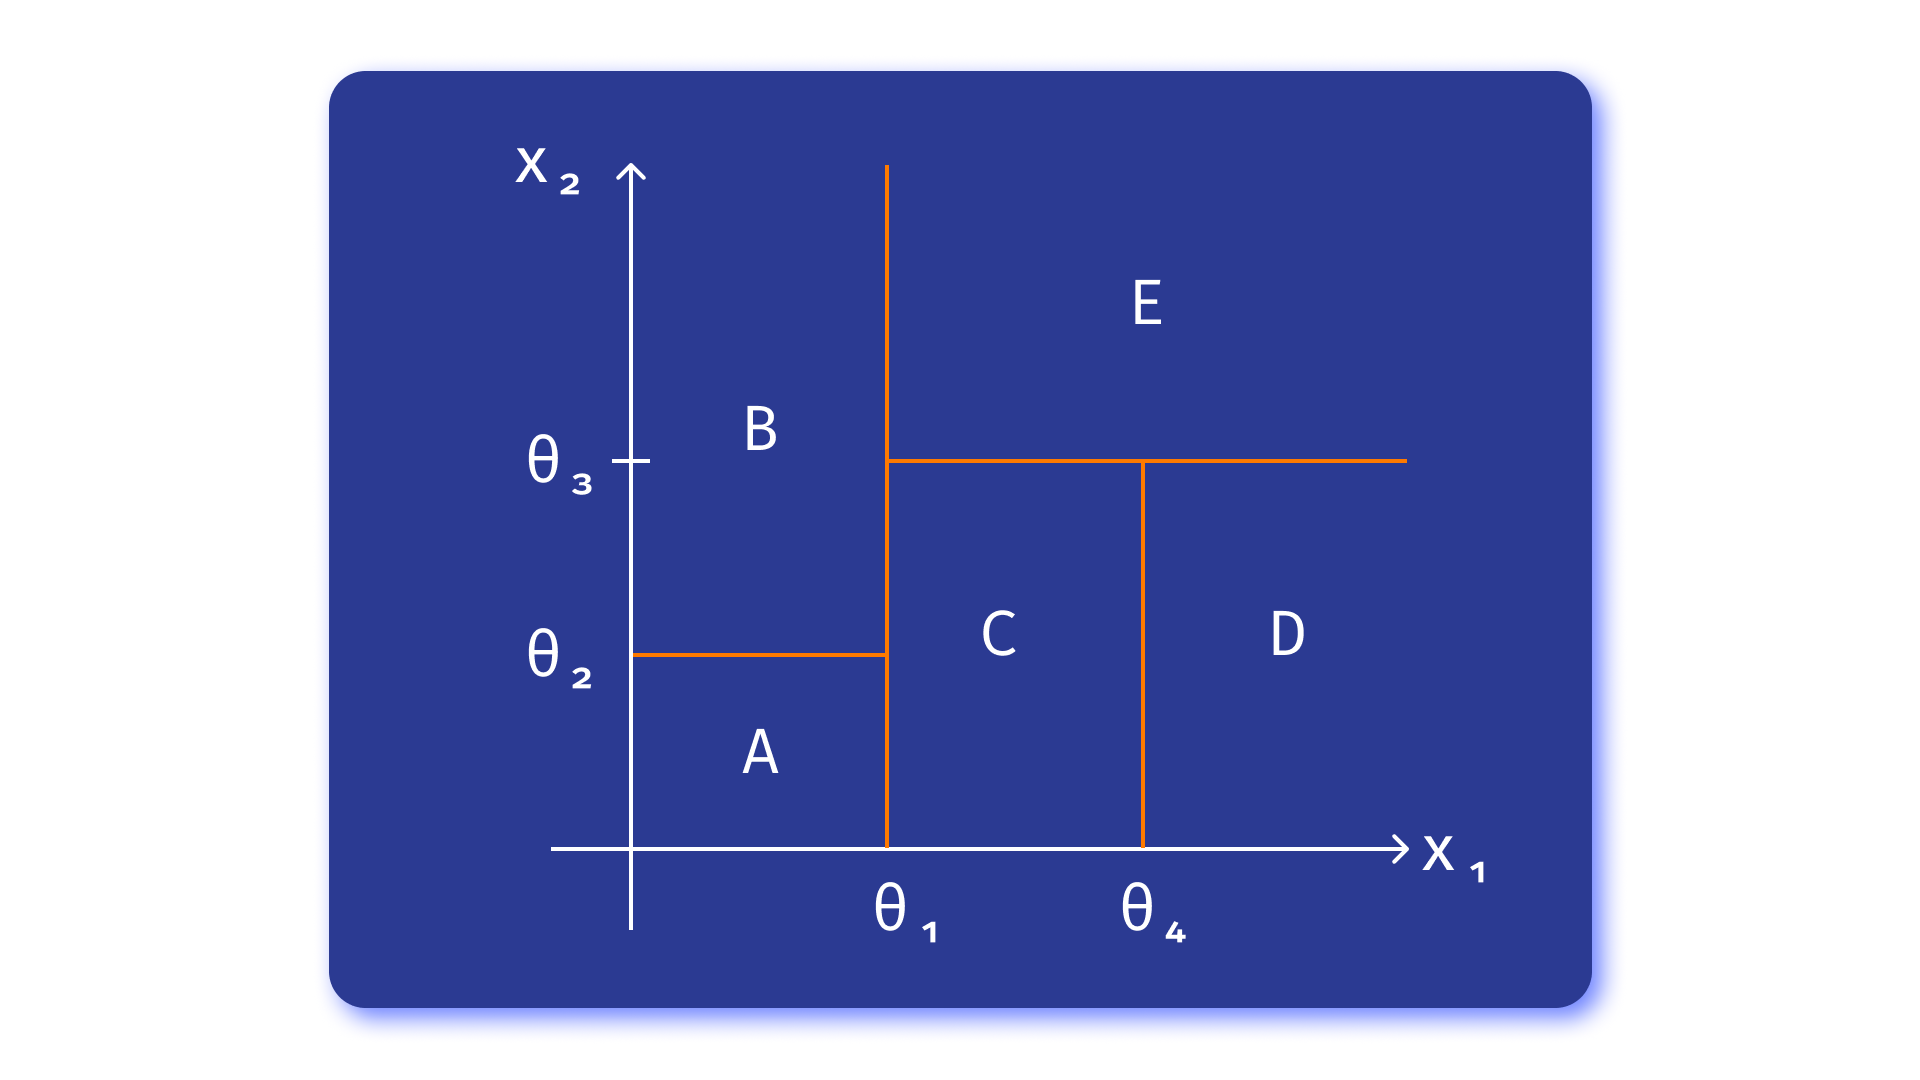



Действительно, для данной картинки структура решающего дерева будет выглядеть так:

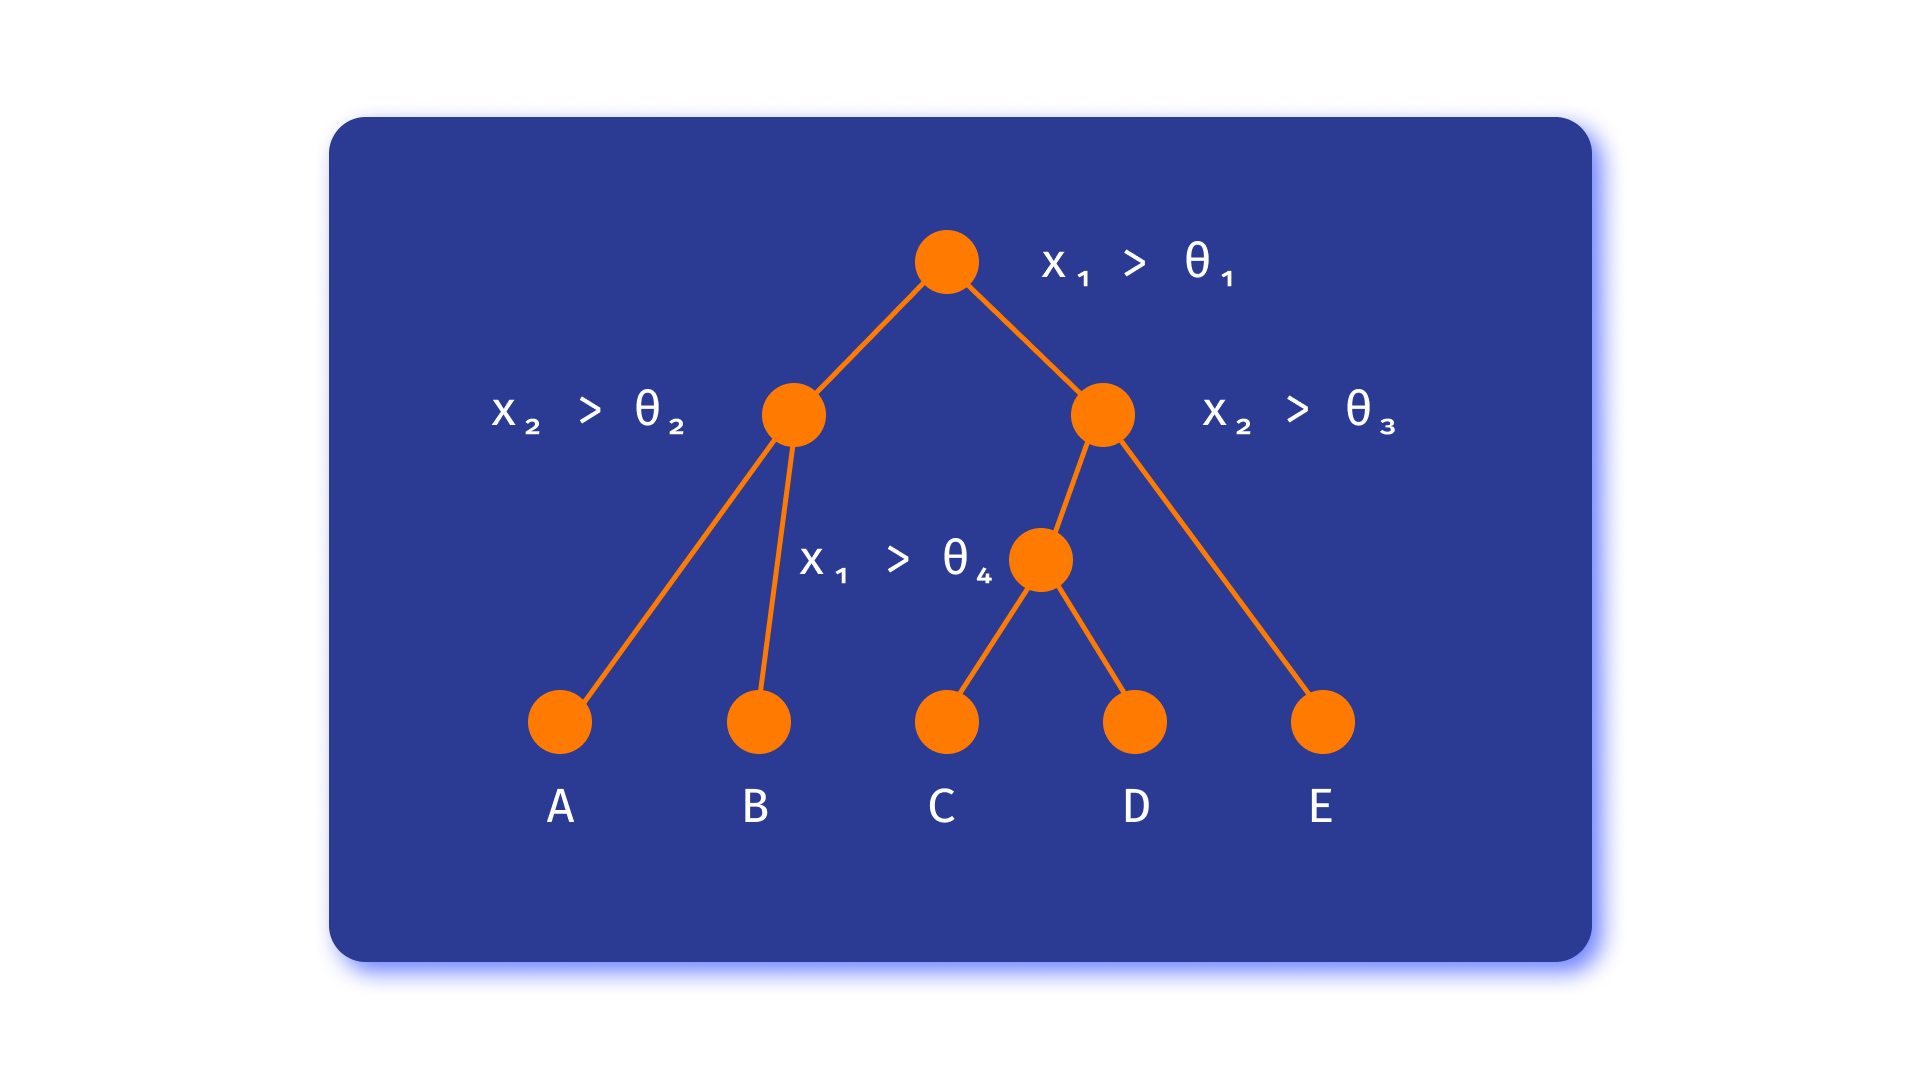

# Построение решающих деревьев

Мы разобрались, как работает алгоритм решающего дерева, когда дерево уже построено. Но пока не совсем ясно как, имея на руках размеченную выборку, построить наилучшее решающее дерево для ее разметки. Давайте разберемся с этим вопросом, рассмотрев в качестве примера один из многих алгоритмов построения решающих деревьев.

В целом построение решающих деревьев сводится к следующему:

а) Выбор количества внутренних и листовых вершин.

б) Выбор разметки листовых вершин.

в) Выбор последовательности предикатов во внутренних вершинах.

Обычно построение дерева происходит при помощи последовательного разбиения исходной выборки на две части таким образом, чтобы качество разбиения каждой подвыборки было наилучшим (что это значит, мы уточним позже). Такое последовательное разбиение задает все 3 пункта построения решающего дерева.

Пока что звучит очень абстрактно. Рассмотрим конкретный пример такого алгоритма.

# LearnID3

Этот алгоритм представляет собой иллюстрацию базовой идеи построения решающего дерева. На сегодняшний день разработаны и более интересные его модификации. Но мы рассмотрим именно базовый вариант.

Алгоритм сводится к следующей последовательности действий:

> 1. На вход мы получаем выборку пар объектов, взятых из пространства признаковых описаний X и ответов из множества классов: U = {$(x,y) | x \in X, y \in \{1 ... N\}$} (N здесь - число возможных классов).
> 2. Если все объекты в выборке лежат в одном и том же классе c:
>> Вернуть листовую вершину класса c.
>3. Иначе:
>4. Найдем предикат (то есть выражение, принимающее значение True или False) β, с помощью которого наилучшим образом разобьем исходную выборку на 2 части.

Наилучшее разбиение будем строить на основании некоторого правила, которое назовем критерием информативности. Это некоторая функция $H(β, U)$, которая по заданной подвыборке скажет, насколько хорошим было разбиение.
>5. Разбить выборку на 2 части по предикату β: $U_0 = \{x \in U: β(x) = False\}$ и $U_1 = \{x \in U: β(x) = True\}$
>6. Если одна из этих подвыборок пуста, то
>> Вернуть листовую вершину **мажоритарного** класса в U.
>7. Создать новую внутреннюю вершину с предикатом β.
>8. Построить левое поддерево и правое поддерево, вызовом LearnID3($U_0$) и LearnID3($U_1$).



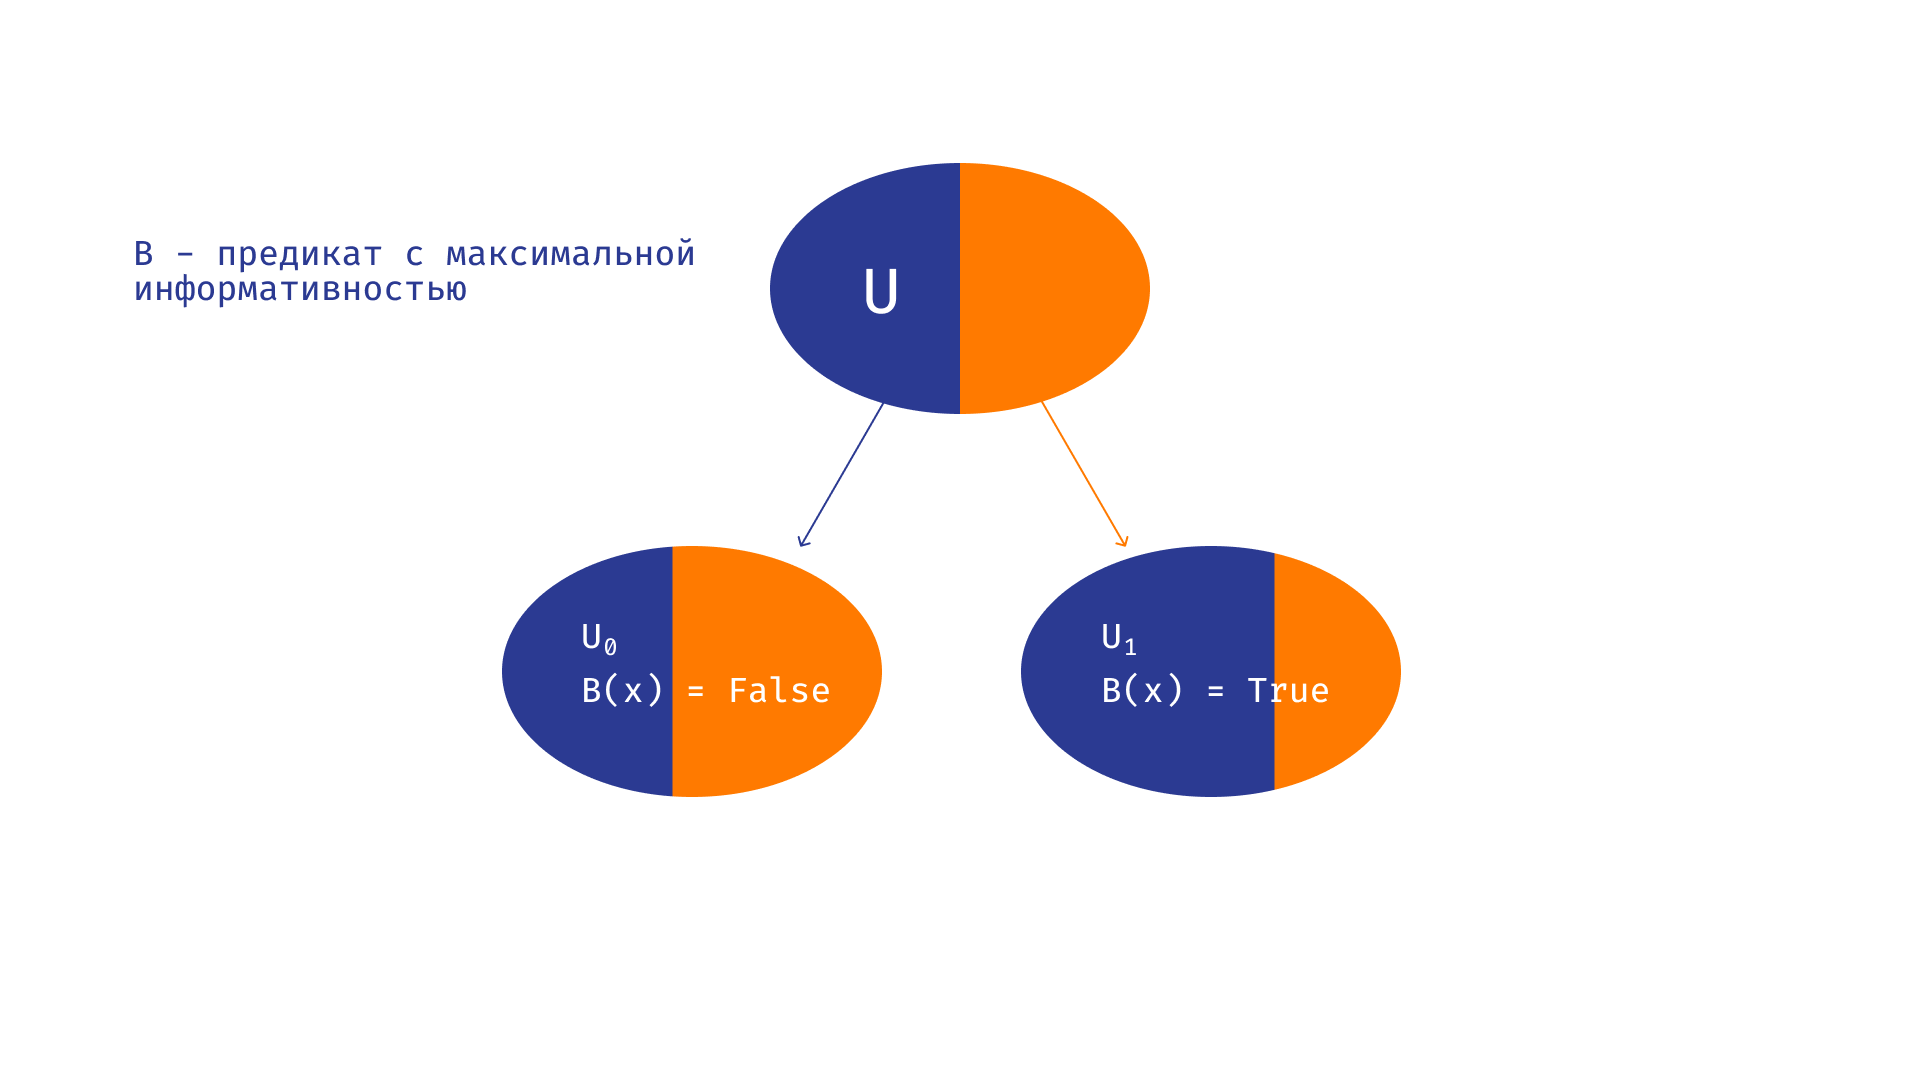

# Критерии информативности

Как уже было сказано, для построения дерева решений необходимо определить некоторый критерий информативности, который оценивает качество распределения целевой переменной среди объектов множества предикатов. То есть чем больше значение критерия информативности, тем более точно подобран предикат.

В качестве примера можно рассмотреть критерий Джини:
$$I(β, X)=|\{(x_i, x_j): y_i=y_j, β(x_i)=β(x_j)\}|$$

Вторым примером служит похожий D-критерий В. И. Донского:
$$I(β, X)=|\{(x_i, x_j): y_i \neq y_j, β(x_i) \neq β(x_j)\}|$$

Критерий Джини считает, сколько из попавших в одну и ту же ветвь согласно разделению по предикату β объектов действительно должны были оказаться в одной ветви.

Критерий Донского же наоборот считает сколько из объектов, попавших в разные ветви, принадлежат разным классам.

Эти критерии похожие, но не эквивалентные.

# Замечание
___________________
Нужно отметить, что классическим критерием в процедуре LearnID3 служит третий критерий - энтропийный. Он оценивает информационные свойства разбиения. Мы не рассматриваем его, поскольку для этого нам пришлось бы погрузиться в изучение теории информации, предварительно проговорив основные положения теории вероятностей. Однако представленые критерии дают представление о возможном способе отбора предикатов, который мы считаем вполне достаточным для правильной и качественной работы с данными моделями.
___________________

# Критерии останова

Если продолжить процедуру LearnID3 до конца, мы получим очень сильно переобученную структуру. Поэтому рассмотрим некоторые критерии досрочной остановки этой процедуры.

В качестве примеров критерия останова можно рассмотреть следующие правила:

1. Ограничение на размеры дерева (максимальная глубина, количество листовых вершин, общее количество вершин).
2. Ограничение на количество объектов в листовых вершинах.
3. Остановка алгоритма в случае, если все объекты относятся к одному классу.

# Обработка пропусков решающими деревьями

Решающие деревья обладают замечательным свойством:
они могут работать с данными, в которых есть пропуски. Идея такого свойства очень простая.

Пусть нам встретился объект с пропуском в i-й координате, то есть мы не знаем, чему равно значение $x_i$.

Пусть в листовой вершине V нам необходимо вычислить значение предиката $β_v$ вида $\beta_v = [x_i > a]$ (или $[x_i < a]$), где a - некоторое число. Значение предиката не может быть вычислено, то есть мы не знаем, следует ли нам отправить объект x в правую ветвь дерева или же в левую.

Тогда примем решение следующим образом:

На этапе обучения дерева в каждой вершине будем считать вероятность отправить случайно выбранный объект влево или же вправо (то есть посчитаем, сколько объектов из обучающей выборки мы отправили влево, а сколько вправо, а затем поделим то и то на количество объектов в выборке).

На этапе тестирования модели мы определяем, в какую ветку наш объект попадет с наибольшей вероятностью. Согласно оценке этой вероятности, сформированной на этапе обучения, и принимаем соответствующее решение.

Работа алгоритма продолжается несмотря на невозможность вычисления значения некоторого предиката.


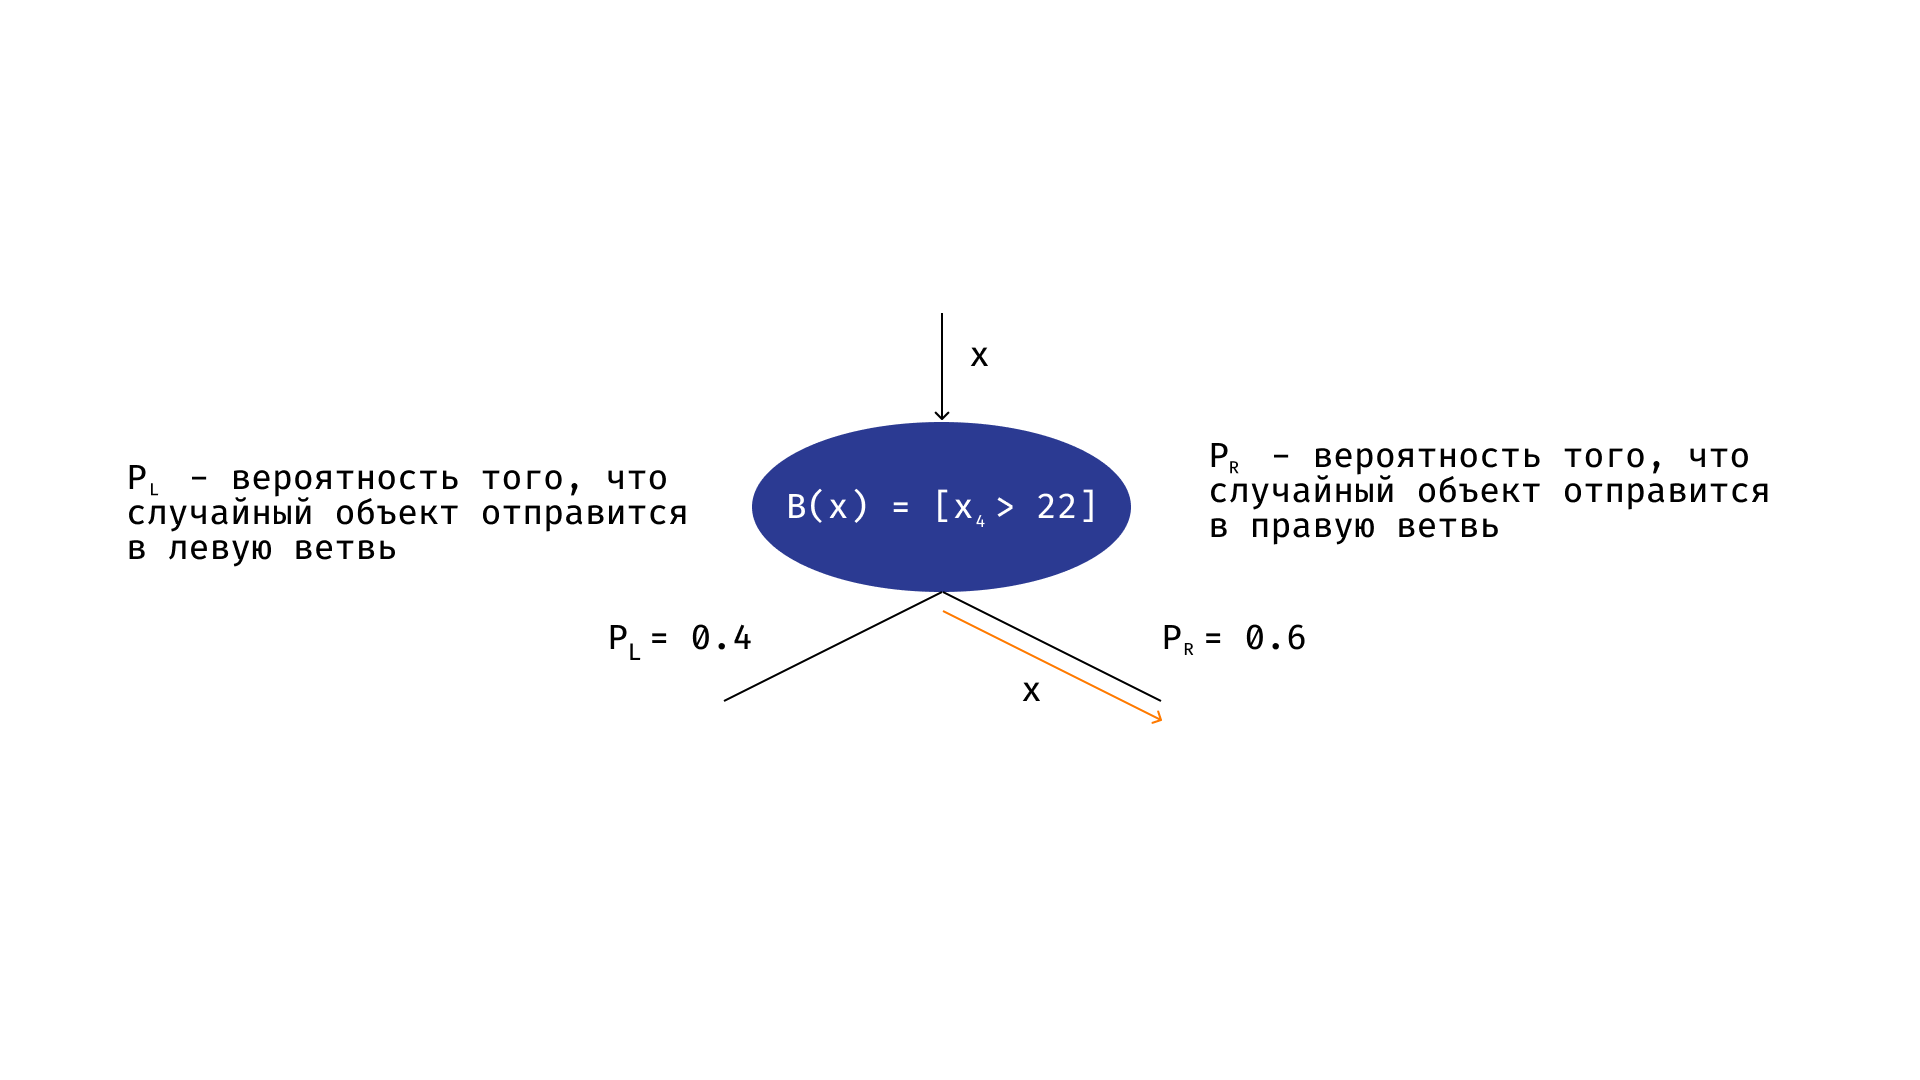

# Обобщение на задачу регрессии

Обобщение на задачу регрессии строится при помощи следующего трюка: вместо метки класса в листовую вершину поместим некоторое значение предсказания. В дальнейшем алгоритм работы решающего дерева очень похож на случай классификации: мы распределяем объекты по листовым вершинам, а также в процессе обучения считаем среднее значение меток для объектов, попавших в каждую из листовых вершин. Предсказание на этапе теста будет равно именно этому среднему значению.

В случае с регрессией и критерии ветвления  используются другие. Изученные ранее критерии не подходят, ведь теперь понятие класса объекта вообще не определено. В связи с этим определяются другие критерии ветвления, например критерий ветвления, основанный на минимизации дисперсии меток объектов, абсолютное отклонение от медианы и т.п.

## Связь критериев ветвления с классическими функциями потерь*

_____________________________
Критерии ветвления для деревьев имеют смысл, аналогичный loss-функции для линейных алгоритмов.

Например, пусть задача нашего дерева - минимизировать среднеквадратичную ошибку в каждом листе. То есть если $Y$ - набор меток объектов, относящихся к некоторому листу, $c$ - предсказание данного листа. Функцию потерь тогда мы могли бы определить следующим образом:
$$L(y_i, c) = (y_i - c)^2$$
Тогда оценка loss на всём наборе в данном листе:
$$Q(X, Y, c) = \frac{1}{N}\sum\limits_{i=1}^N(y_i - c)^2 → \min\limits_c$$
Оптимальным $c$ в данном случае будет, как не трудно убедиться, $c = \frac{\sum\limits_{i=1}^Ny_i}{N}$
Тогда:
$$Q^*(X, Y) = \frac{1}{N}\sum\limits_{i=1}^N(y_i - \bar{y})^2$$
Где $\bar{y}$ - это среднее значение $y_i$. То есть, $Q^*$ представляет из себя оценку дисперсии выборки в каждом листе, которую мы хотим минимизировать. То есть минимизация $Q^*$ и есть наш критерий ветвления.

Аналогичным образом можно прийти, например, к тому, что критерий минимизации абсолютного отклонения меток в листе от медианного значения соответствует другой популярной функции потерь:
$$L(y_i, c) = |y_i - c|$$

# Переобучение и недообучение
______________________________________________
Сделаем небольшое отступление и обсудим две очень важные проблемы обучения всех моделей ML.

Эти общие проблемы называются **переобучением** и **недообучением**. Их названия достаточно полно описывают их суть, но мы подробно разберёмся в причинах их возникновения.



## Недообучение
Недообучение - это случай, когда модель по тем или иным причинам не смогла обобщить закономерности в данных и выучить необходимые зависимости.

Общих причин у проблемы недообучения может быть две:
- Модели просто не хватило времени на обучение. Под временем здесь понимается, скажем, количество шагов градиентного спуска. То же может относиться к неправильно выставленным гиперпараметрам, например, learning rate (см. Лекцию 3)
- Модель технически не может выучить слишком сложные для неё зависимости. Иначе говоря, модели не хватает **ёмкости**. Приведем пример такой ситуации.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

x = np.linspace(-1, 1, 100)
y = np.polyval([2, 1, 0.3, -1], x) + np.random.randn(x.shape[0]) * 0.2

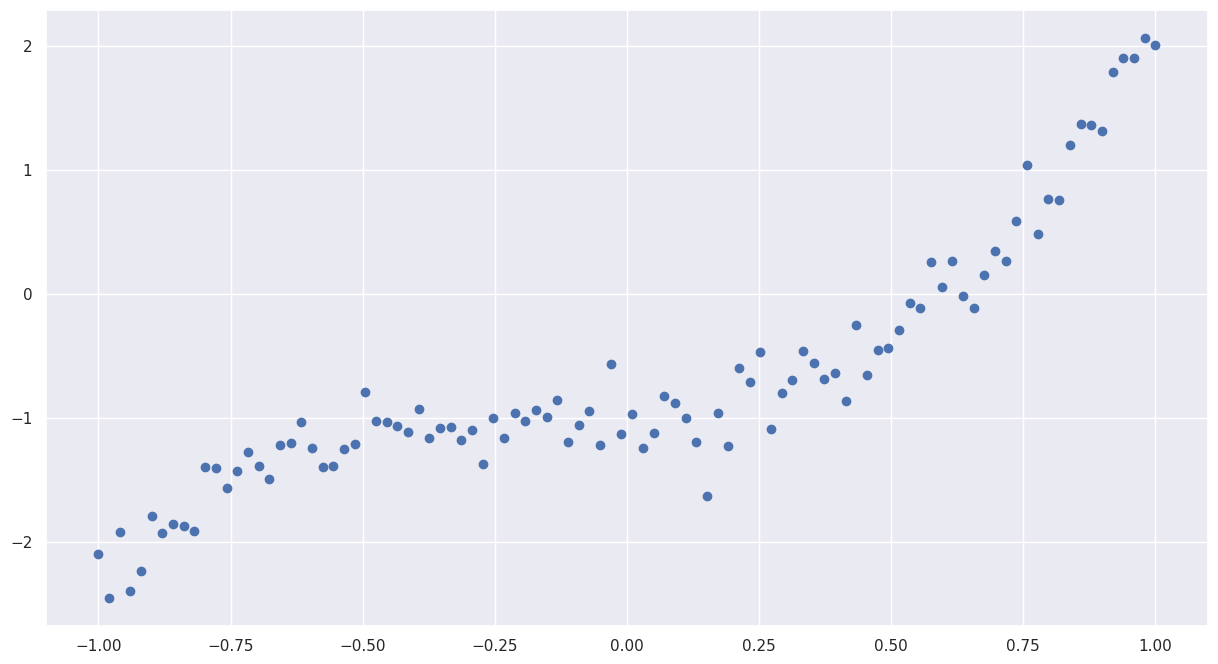

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x,y)

В данном случае требуется смоделировать поведение полинома 3 степени. Что получится, если мы попробуем построить линейную регрессию?

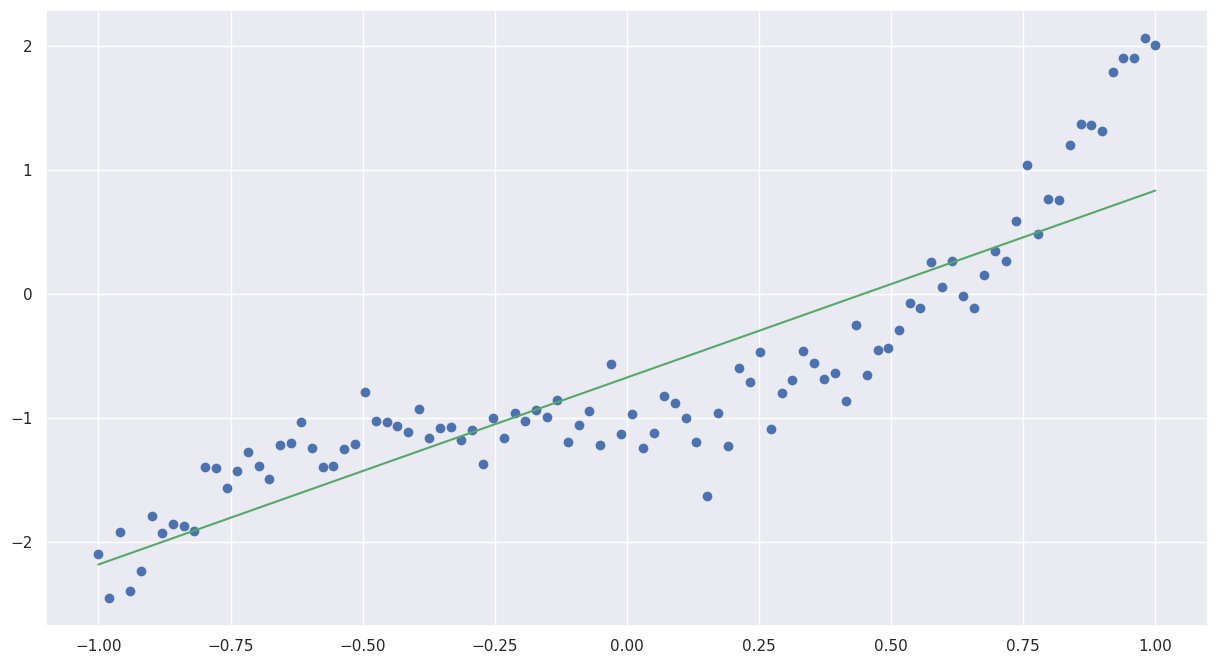

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x.reshape(-1, 1), y)
preds = LR.predict(x.reshape(-1, 1))

plt.figure(figsize=(15,8))
plt.scatter(x, y)
plt.plot(x, preds, c="g")

Очевидно, что логистическая регрессия с этой задачей не справляется. Всё дело в том, что этой модели банально не хватает параметров для того, чтобы смоделировать слишком сложную зависимость. Это один из возможных примеров ситуации **недообучения**.

Решение проблемы недообучения обычно довольно простое. Достаточно выбрать более сложные модели с большим числом параметров, либо увеличить количество итераций обучения.

Если в приведенном примере мы увеличим число параметров модели, заменив линейную регрессию полиномиальной регрессией третьей степени, мы без труда решим поставленную задачу с достаточно высокой точностью.

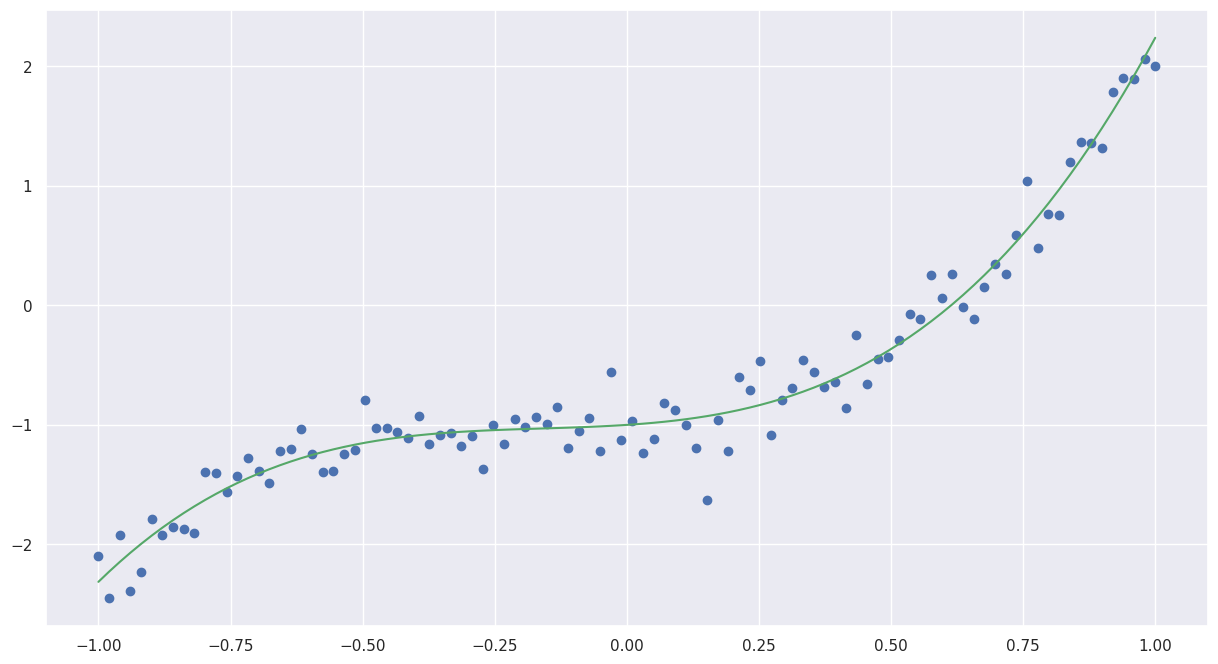

In [ ]:
coef = np.polyfit(x, y, 3)
preds = np.polyval(coef, x)


plt.figure(figsize=(15,8))
plt.scatter(x, y)
plt.plot(x, preds, c="g")

## Переобучение

Проблема переобучения более сложная и комплексная, чем проблема недообучения.

Если недообучение связано с недостаточной сложностью выбранной модели, то переобучение следует из **избыточной сложности**. Вопреки нашим ожиданиям, слишком сложная модель также неспособна выучить нужные зависимости в данных. Вернее, она с высокой вероятностью выучит зависимости в данных, которые там появились по чистой случайности и не являются естественными для нашей задачи.

Другой распространённой причиной проблемы переобучения является **недостаток данных**. На самом деле, недостаток данных в некоторых случаях может быть скомпенсиррован уменьшением сложности модели. Наше желание усложнить модель всегда приводит нас к необходимости увеличить и набор данных, которые мы используем для обучения.

Приведём несколько примеров:

### Пример 1

Представьте себе, что Вы обучаете иностранца из очень далёкой страны играть в "монетку". Вы хотите, чтобы он понял основную суть игры: у монетки есть 2 состояния ("орёл" и "решка"), которые выпадают случайно с равной (или почти равной) вероятностью.

Вы начинаете демонстрировать иностранцу серию экспериментов, подбрасывая монетку и объявляя ему результат.

Допустим, вы бросили монетку 3 раза и остановились на этом. Житейский опыт подсказывает, что результат трёхкратного выпадения орла в этом случае совершенно реален. Предположим, так и вышло и иностранец услышал, что трижды выпал орёл. Что произойдёт, если теперь Вы спросите у него, как он понимает правила этой игры?

Иностранец, конечно, скажет Вам, что эта игра очень глупая и весь её смысл сводится к тому, чтобы наблюдать выпадения орла.
Это заблуждение иностранца - следствие его переобучения из-за недостатка данных.

### Пример 2

Когда мы обсуждали недообучение, мы пытались смоделировать многочлен третьей степени слишком простой моделью, то есть линейной регрессией. Она плохо справилась с задачей. Здравый смысл подсказывает нам, что и полином второйй степени вряд ли справится с этой задачей хорошо, ведь исходные данные смоделированны при помощи поолиномиальной зависимости третьей степени. Вот почему полином третьей степени уже достаточно хорошо смоделировал эту выборку. А что если взять полином 4 степени в качестве модели? А 5? Может быть, 30 степени? Ведь каждый из них может моделировать и зависимости меньших порядков, то есть в теории полином 30 степени должен также хорошо справиться с задачей, как и полинном 3 степени, а может даже лучше.

Проверим, так ли это

In [ ]:
x = np.linspace(-1, 1, 20)
y = np.polyval([2, 1, 0.3, -1], x) + np.random.randn(x.shape[0]) * 0.5

<ipython-input-15-55a92ab26d74>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


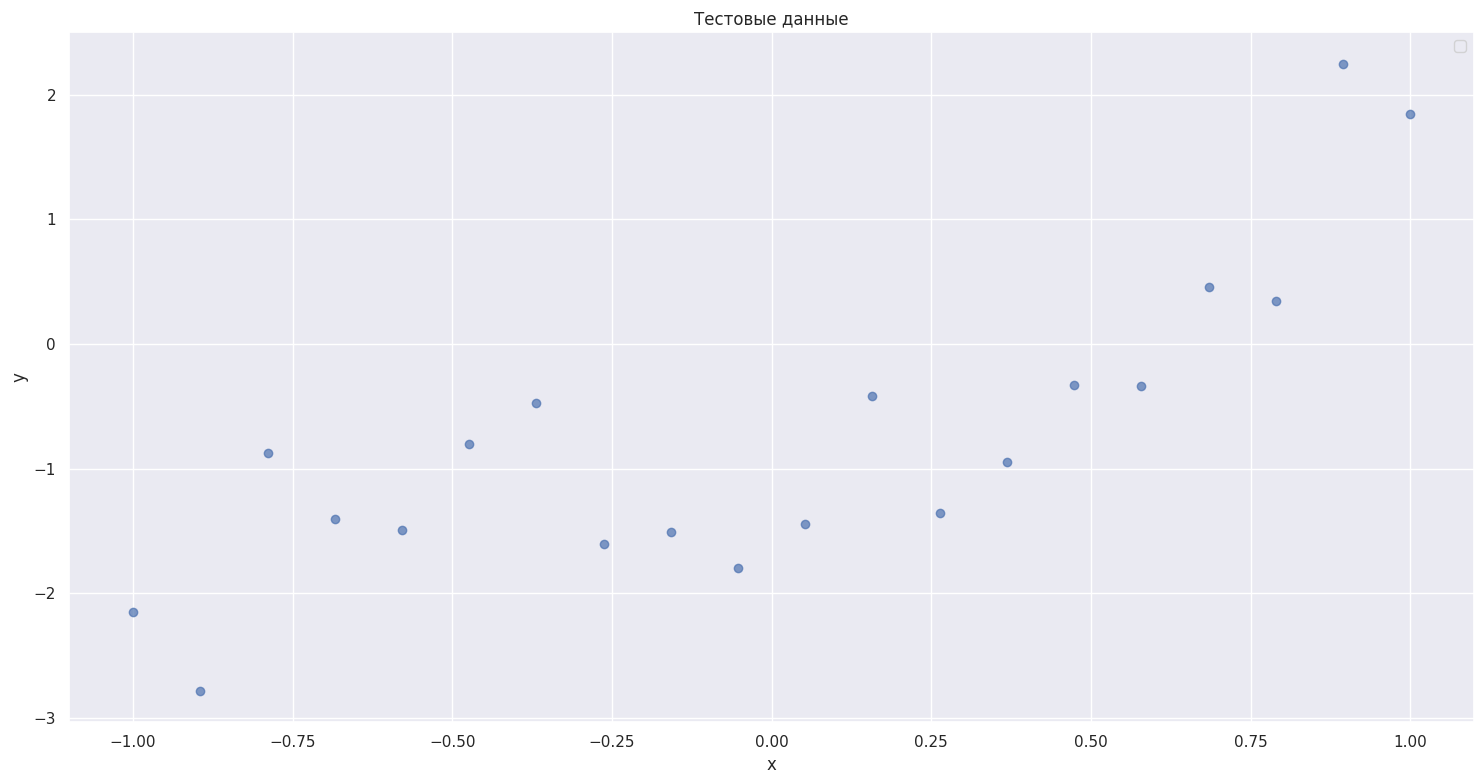

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.7)

plt.title('Тестовые данные')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()

plt.show()

<ipython-input-16-424a8b300f96>:3: RankWarning: Polyfit may be poorly conditioned
  coef_30 = np.polyfit(x, y, 30)


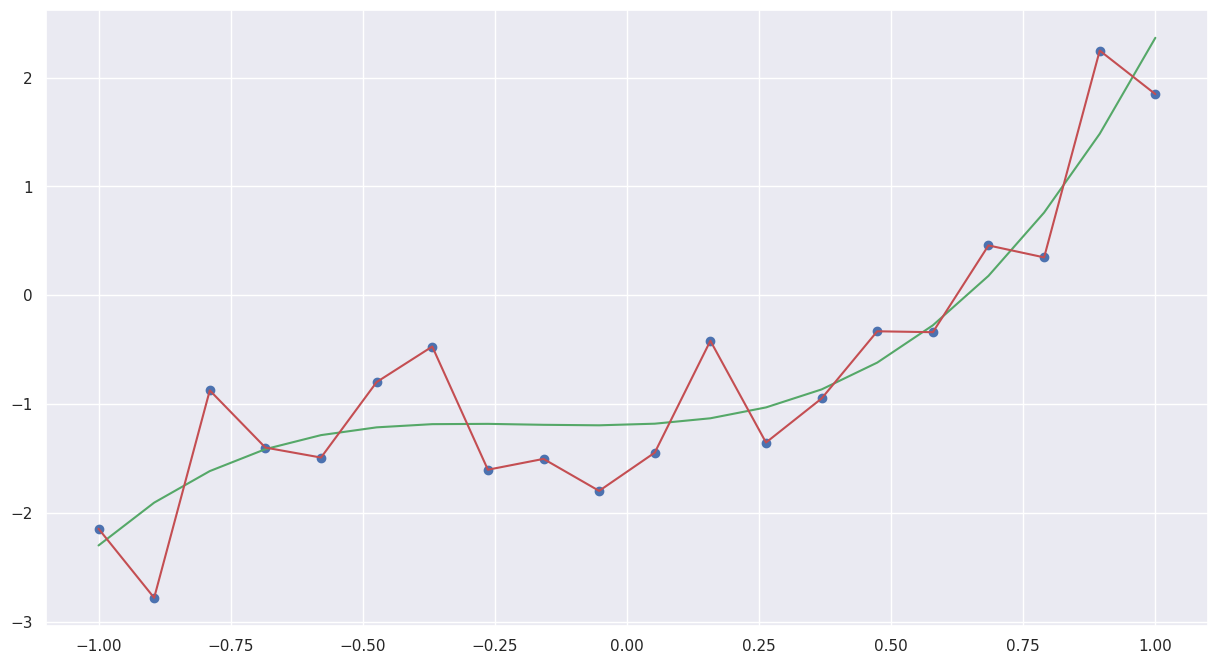

In [ ]:
# Найдем полиномиальную зависимость нужной степени при помощи np.polyfit
coef_3 = np.polyfit(x, y, 3)
coef_30 = np.polyfit(x, y, 30)
preds_3 = np.polyval(coef_3, x)
preds_30 = np.polyval(coef_30, x)

# Изобразим полученный результат
plt.figure(figsize=(15,8))
plt.scatter(x, y);
plt.plot(x, preds_3, c="g");
plt.plot(x, preds_30, c="r");

Кажется, что-то не так. Полином 30 степени, конечно, справился с приближением  предложенных ему конкретных точек, но кажется, что он выучил не настоящую зависимость, а скорее обусловленную какими-то случайными факторами.

Для того чтобы понять, всё ли он делает правильно, мы должны предложить ему какие-то новые примеры, на которых он не учился. Такие примеры называются **тестовой выборкой**.
Сгенерируем тестовую выборку из того же распределения и проверим, насколько хорош этот полином при тестировании.

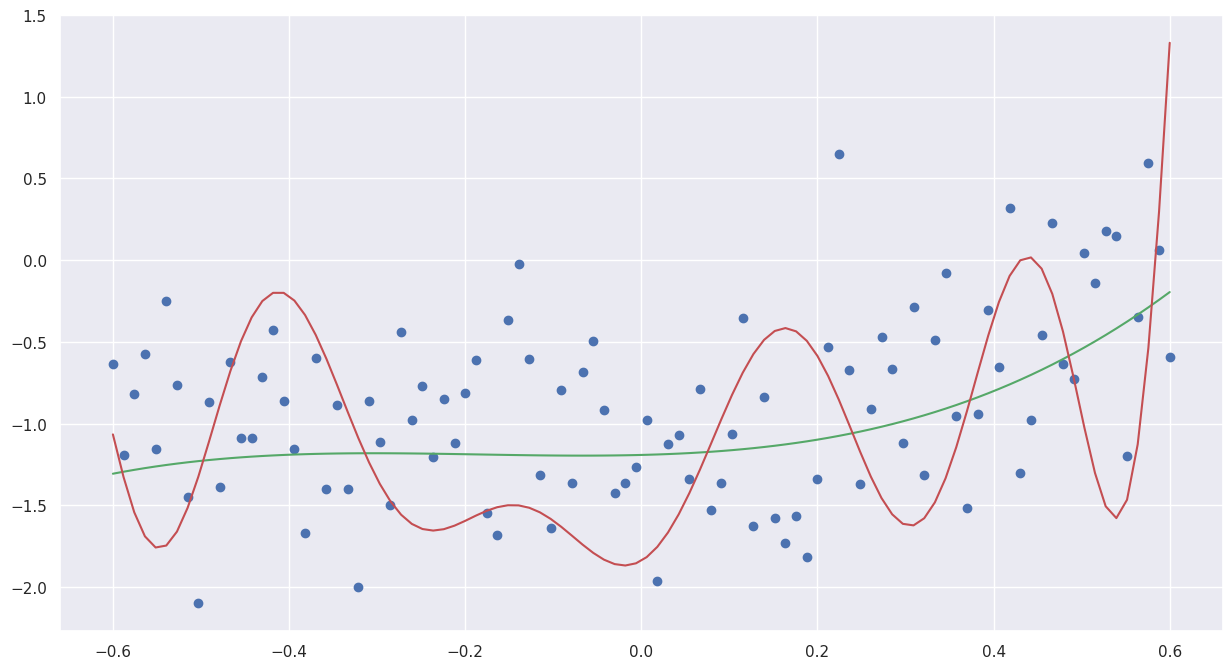

In [ ]:
x_test = np.linspace(-0.6, 0.6, 100)
y_test = np.polyval([2, 1, 0.3, -1], x_test) + np.random.randn(x_test.shape[0]) * 0.5

preds_test_3 = np.polyval(coef_3, x_test)
preds_test_30 = np.polyval(coef_30, x_test)

plt.figure(figsize=(15,8))
plt.scatter(x_test, y_test)
plt.plot(x_test, preds_test_3, c="g")
plt.plot(x_test, preds_test_30, c="r")

Очевидно, полином 3 степени проявляет себя существенно лучше. Это можно подтвердить, измерив метрики качества регрессии.

In [ ]:
from sklearn.metrics import mean_absolute_error as mse

mse_3_train = mse(y, preds_3)
mse_30_train = mse(y, preds_30)
mse_3_test = mse(y_test, preds_test_3)
mse_30_test = mse(y_test, preds_test_30)

In [ ]:
mse_3_train

0.40825166449440536

In [ ]:
mse_30_train

4.1866551891978077e-11

In [ ]:
mse_3_test

0.42208092160516897

In [ ]:
mse_30_test

0.6635915999907563

Обратите внимание: ошибка полинома 30 степени на тренировочной выборке практически равна нулю. Это связано с тем, что в тренировочной выборке было всего 20 точек. Всегда можно подобрать такой полином 30 степени, чтобы он проходил через все точки произвольного набора из 20 штук. А вот на тестовой выборке его результат почти в 2 раза хуже результата на тестовой выборке.

Приведённый способ - один из основных способов отслеживания переобучения.

______________________________________________

# Достоинства и недостатки


## Достоинства
- Они легко интерпретируемы. В бизнесе это часто становится ключевым. Более сложные алгоритмы (о которых мы поговорим позже) напоминают «чёрный ящик» и не ясно, по какому именно принципу они принимают решения. Деревья решений могут легко визуализироваться: можно почти всегда ответить на вопрос почему на этом объекте получился данный прогноз.
- Годятся и для классификации, и для регрессии — в этом случае в листьях дерева будут числа, а не значение класса.
- Достаточно быстры.
- Не требуют серьезной предобработки данных: деревья не чувствительны к масштабу признаков и устойчивы к их мультиколлинеарности (наличие линейной зависимости между объясняющими переменными (факторами) регрессионной модели).
- Может работать как с числовыми, так и с категориальными признаками.
- Умеет работать с пропусками в данных, хоть и это довольно сложно поддерживается на кодовой основе



## Недостатки
- Они сильно переобучаются, модель слишком сильно подгоняет параметры (разбиение веток) под обучающую выборку. На train она будет работать очень хорошо, а вот на новых данных - нет.  Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением.
- Деревья очень чувствительны к шуму во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка
- Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений (рассмотрим далее).
- Модель умеет только интерполировать, но не экстраполировать (это же верно и для леса и бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки.
- Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси). Часто можно получить очень сложное решение для очень простых задач.


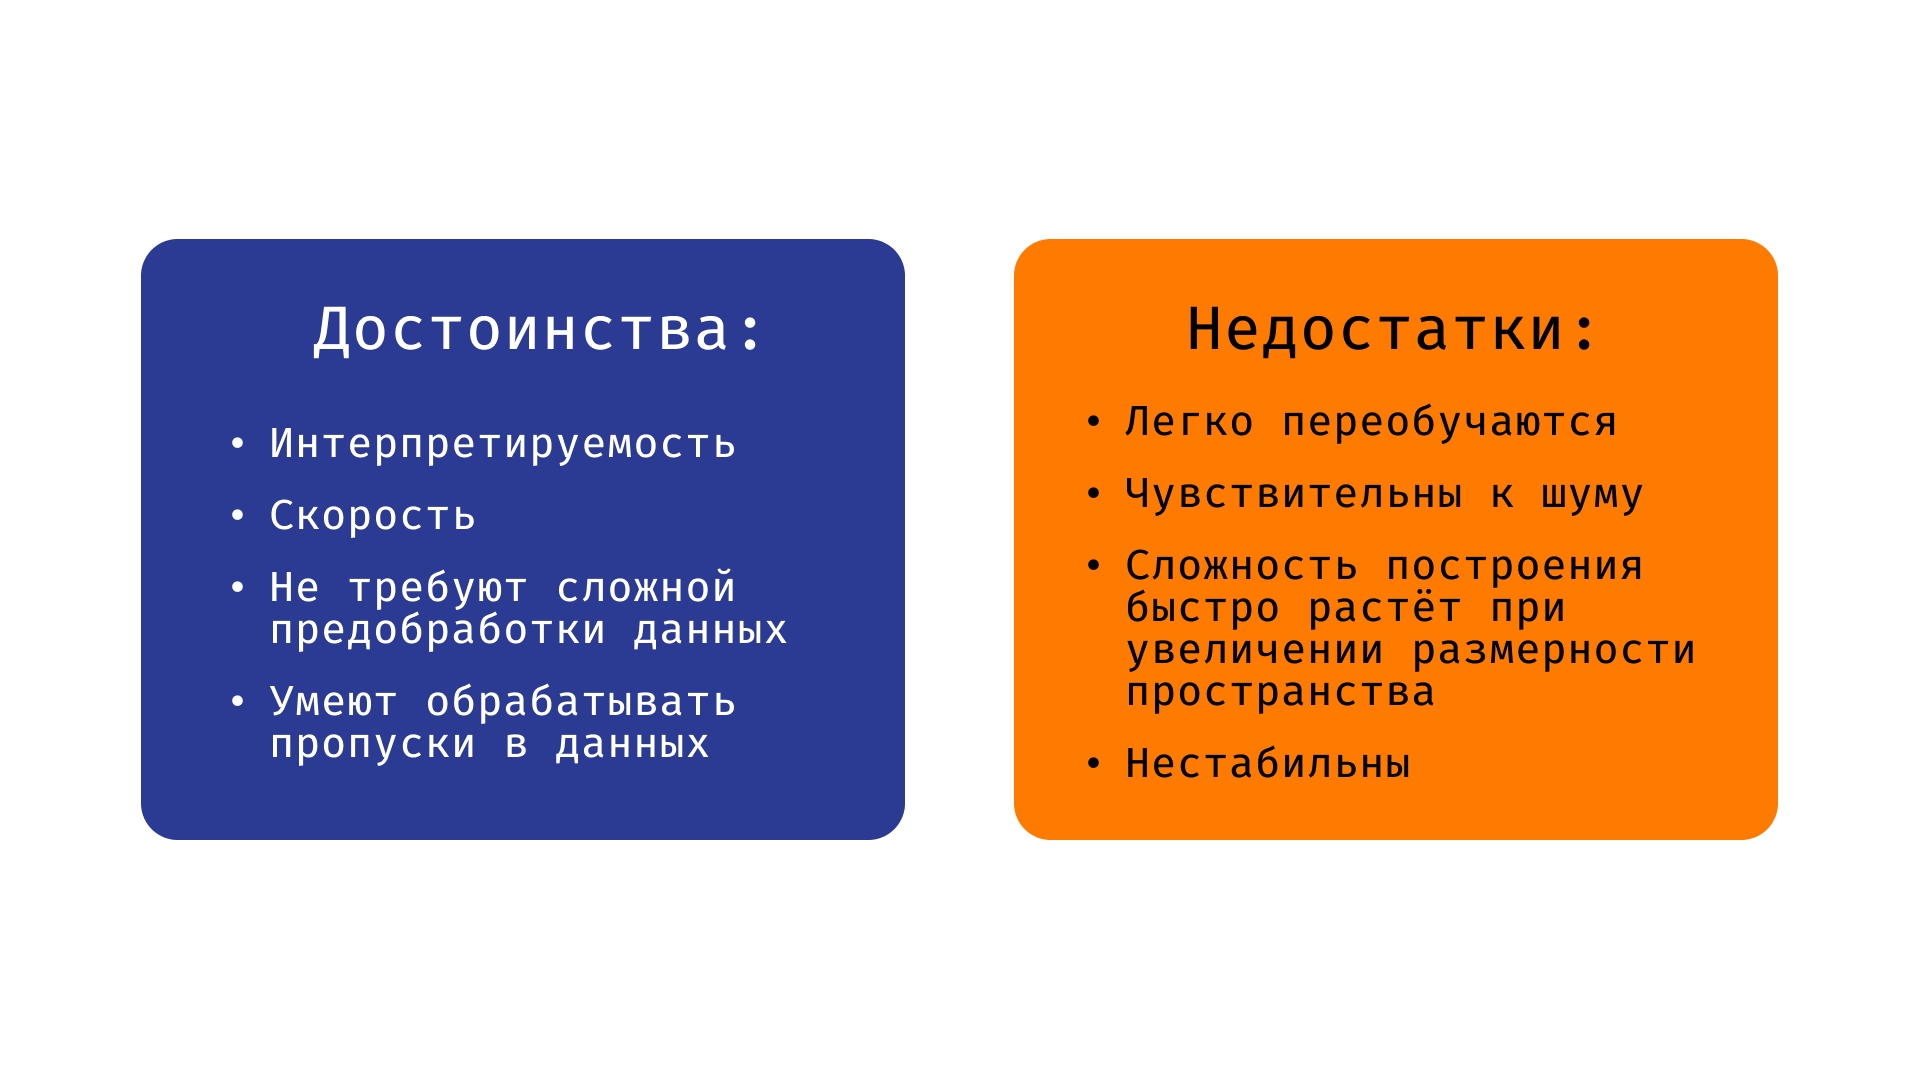

# Примеры

## Синтетический датасет

На примере этого датасета мы посмотрим, как выглядят области принятия решений в задачах классификации при решении этих задач решающими деревьями.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Добавляем точки на плоскости первого класса
np.seed = 10
train_data = np.random.normal(size=(50, 2))
train_data = np.r_[train_data, np.random.normal(size=(50, 2), loc=0.5, scale=2)]
train_labels = np.zeros(100)

# Добавляем точки второго класса
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=4, scale=2)]
train_labels = np.r_[train_labels, np.ones(100)]

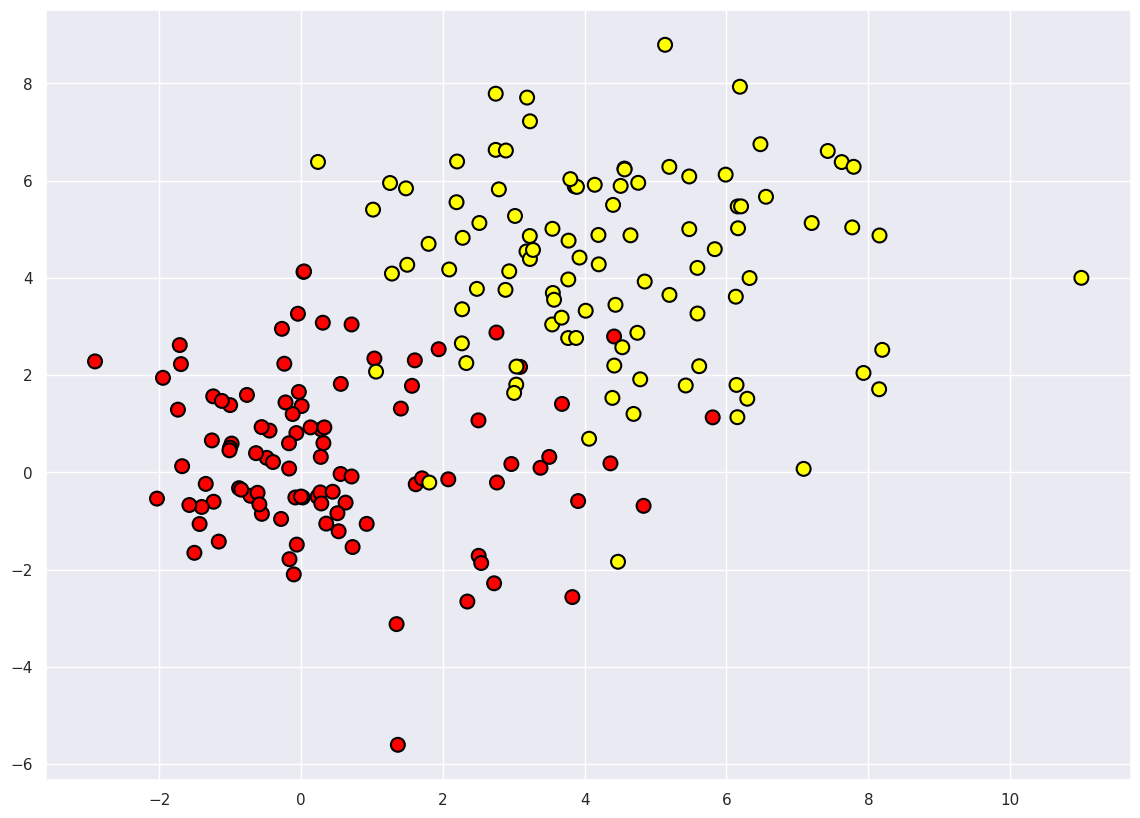

In [ ]:
plt.rcParams["figure.figsize"] = (14, 10)
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)


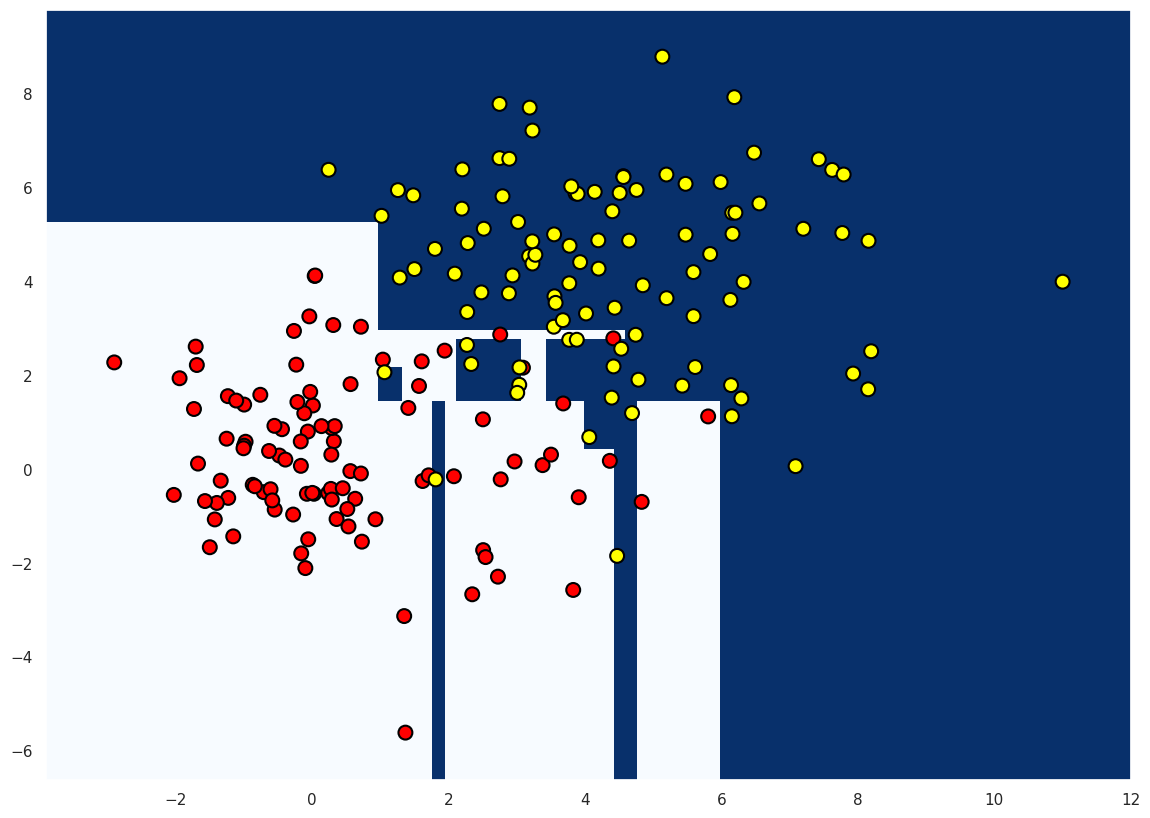

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))



clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=30, random_state=17)

# Обучение дерева
clf_tree.fit(train_data, train_labels)

# Разделяющая поверхность
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

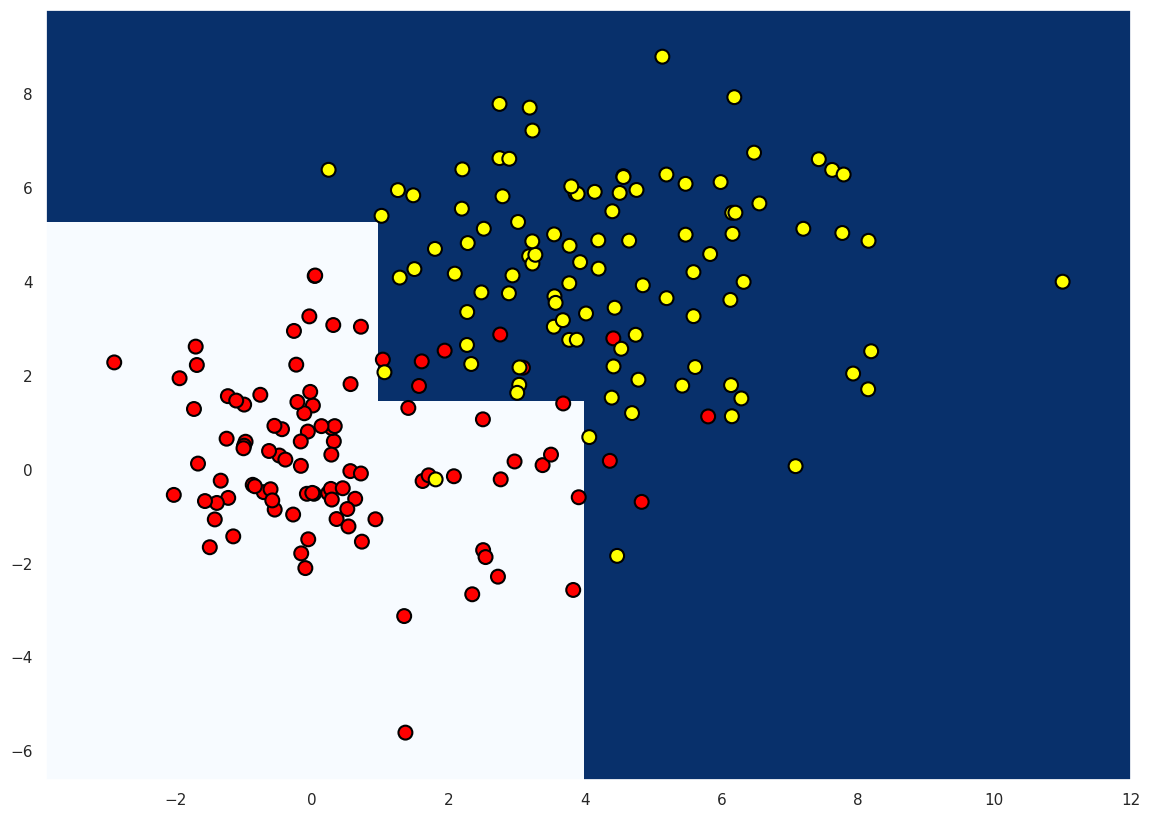

In [ ]:
clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=17)

# Обучение дерева
clf_tree.fit(train_data, train_labels)

# Разделяющая поверхность
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

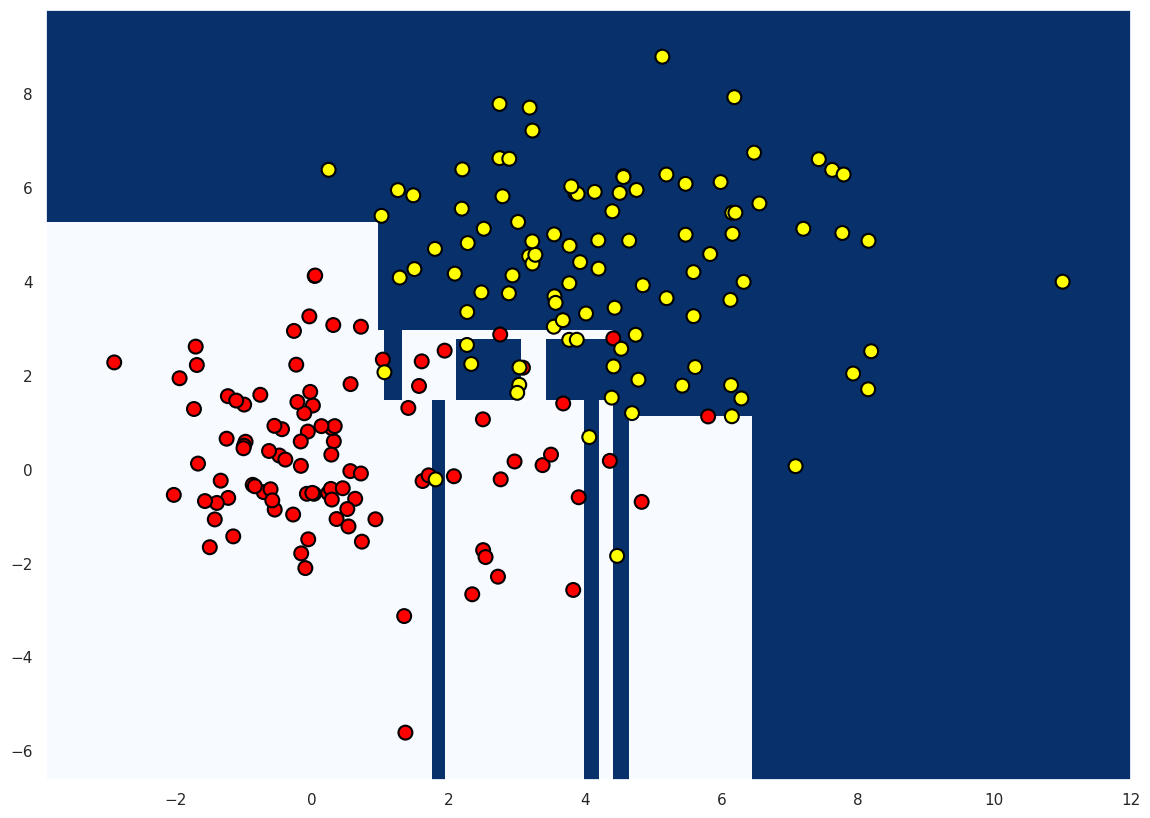

In [ ]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=30, random_state=17)

# Обучение дерева
clf_tree.fit(train_data, train_labels)

# Разделяющая поверхность
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

## IRIS Dataset
Теперь обратимся к уже полюбившемуся нам датасету ирисов Фишера. Посмотрим на области принятия решений, спроецированные на двумерные подпространства признаков.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics

In [ ]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Целевая переменная - сорт цветка-ириса:
- 0 - Setosa
- 1 - Versicolor
- 2 - Virginica

**Задача.** Найти зависимости между размерами (длина/ширина) лепестков и сортами ирисов.

In [ ]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["target"] = iris.target
df["name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


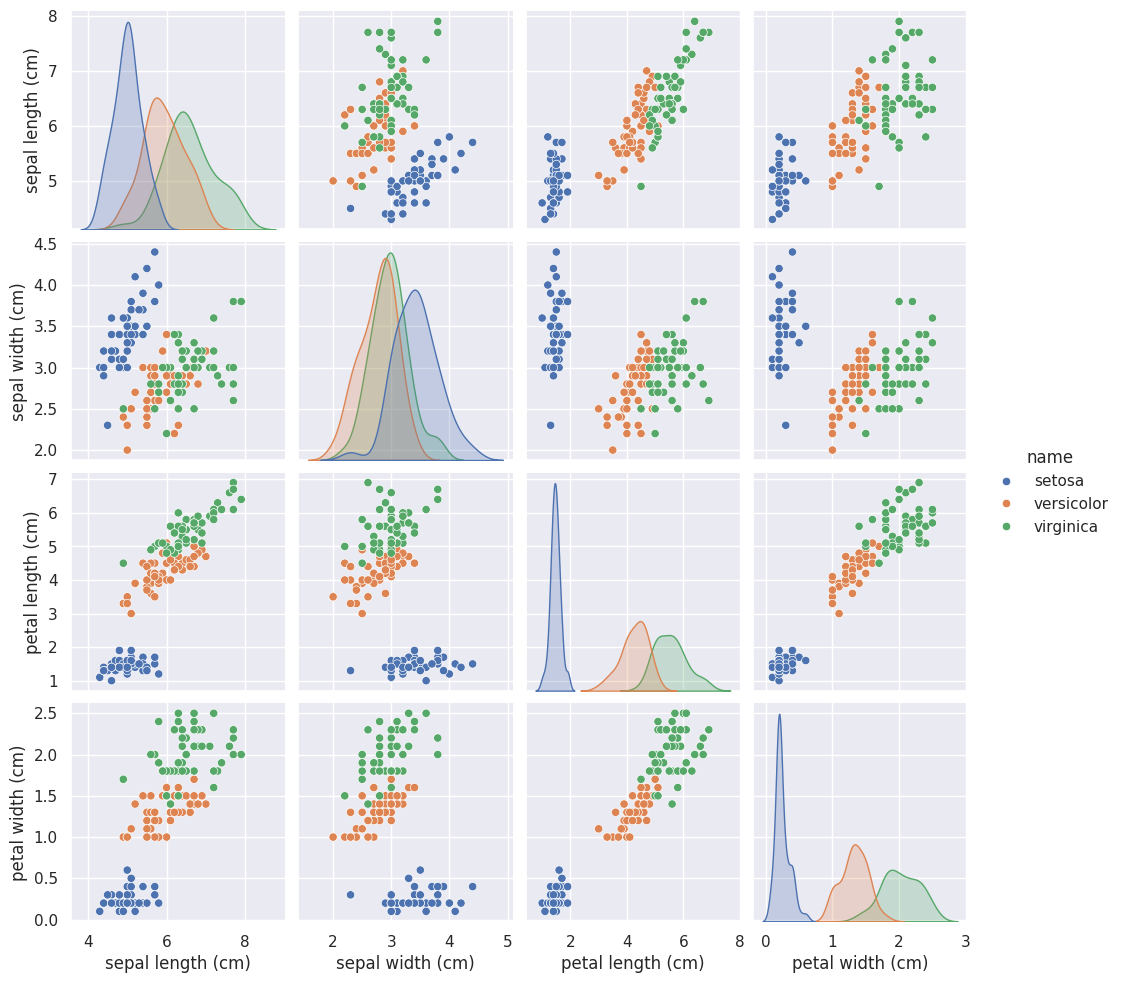

In [ ]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)', 'name']], hue = 'name')

<ipython-input-33-e1b4a979d281>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-33-e1b4a979d281>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-33-e1b4a979d281>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


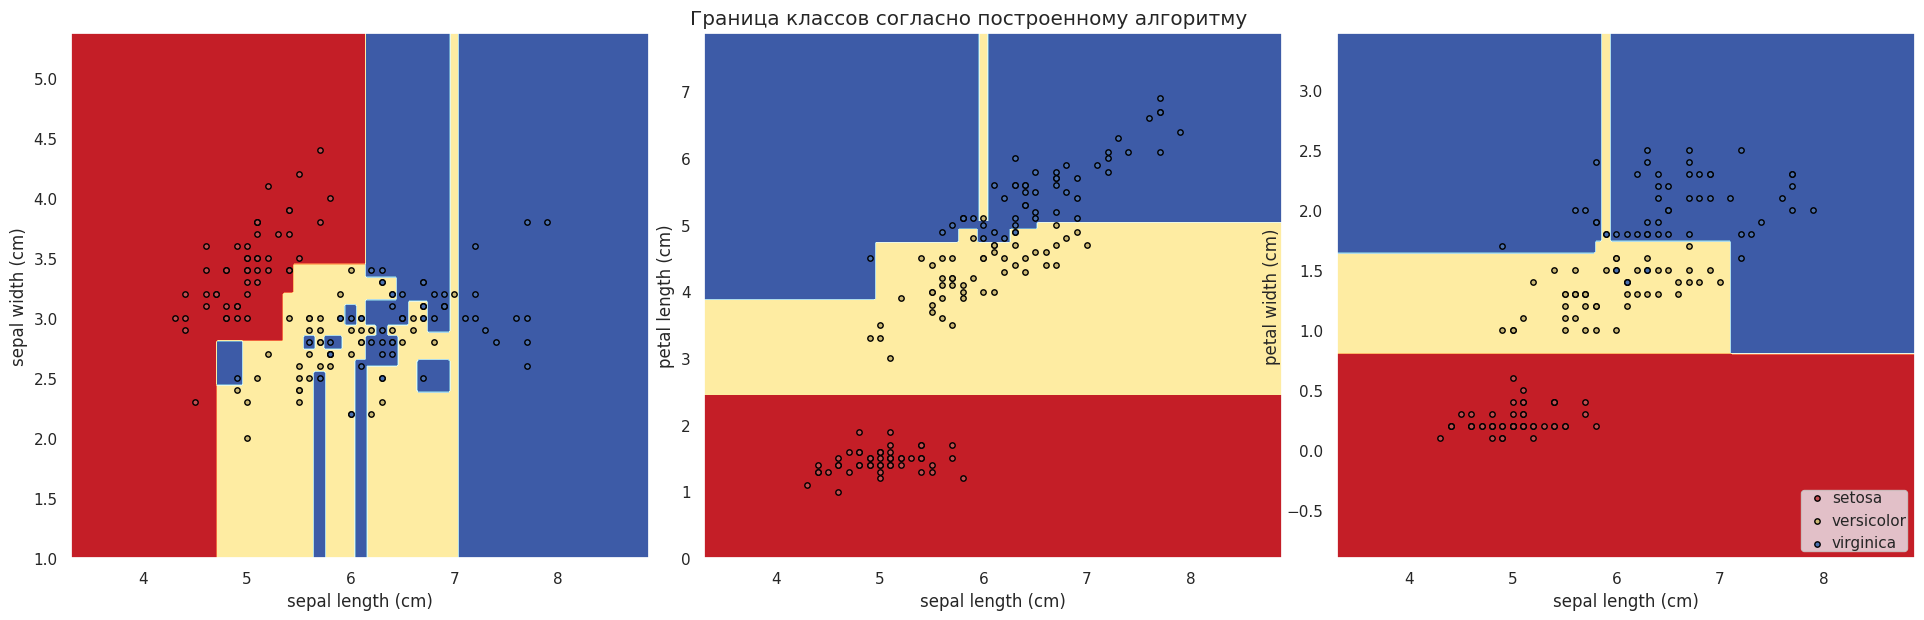

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Задаём параметры
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.figure(figsize=(20, 12))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
    # Выбираем текущую пару признаков
    X = iris.data[:, pair]
    y = iris.target

    # Тренируем модель
    clf = DecisionTreeClassifier(max_depth=40).fit(X, y)

    # Изобразим границу классов
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Визуализация
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Граница классов согласно построенному алгоритму")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)

## Короткий пример решения задачи регрессии

Напоследок приведем пример решения задачи регрессии при помощи решающих деревьев

Попробуем применить решающие деревья для предсказания стоимости квартиры в Калифорнии (популярный датасет california housing).

Подберём оптимальное ограничение на глубину решающего дерева (параметр max_depth). Именно этот параметр используется чтобы избежать переобучения модели.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import tqdm
from tqdm.auto import tqdm

X, y = fetch_california_housing(return_X_y=True)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

scores = []
train_scores = []
for max_d in tqdm(range(2, 100)):
    reg = DecisionTreeRegressor(max_depth=max_d)
    reg.fit(X_train, y_train)
    test_score = reg.score(x_test, y_test)
    train_scores.append(reg.score(X_train, y_train))
    scores.append(test_score)

  0%|          | 0/98 [00:00<?, ?it/s]

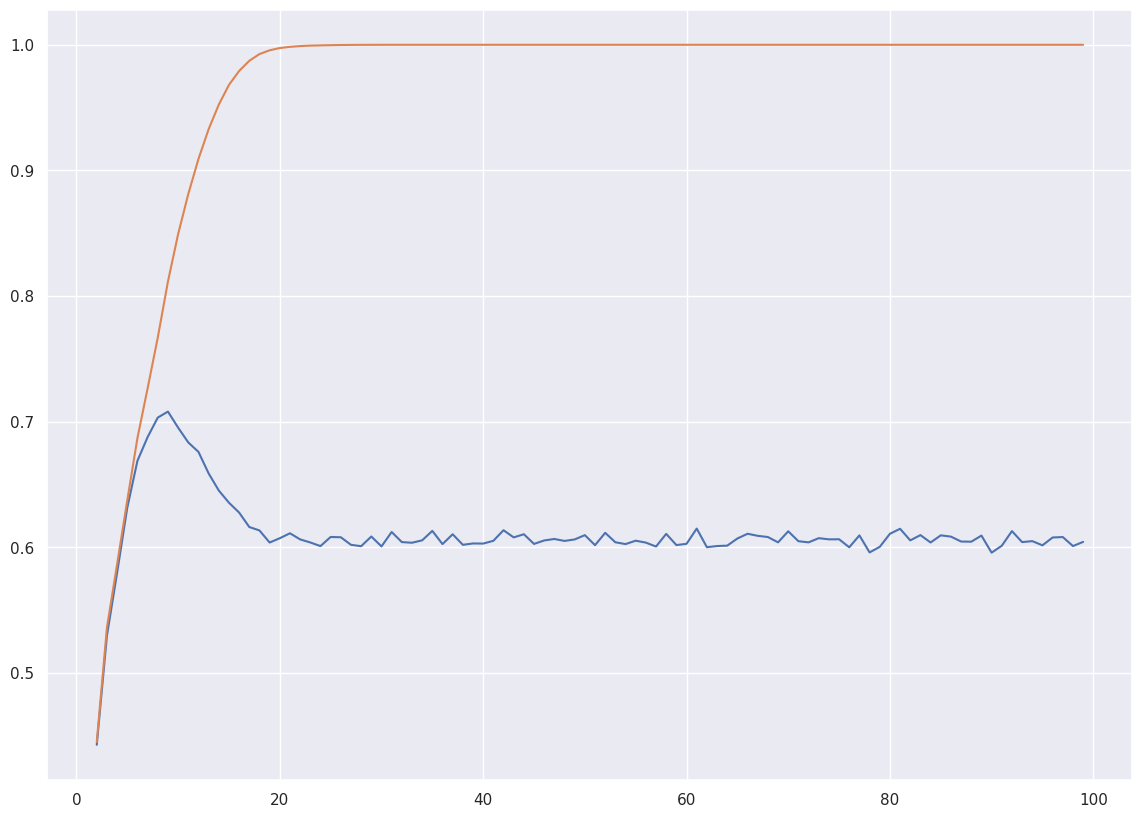

In [ ]:
from matplotlib import pyplot as plt

plt.plot(list(range(2, 100)), scores)
plt.plot(list(range(2, 100)), train_scores)

In [ ]:
max(scores)

0.7081169447288986

In [ ]:
import numpy as np
np.argmax(scores)

np.int64(7)

Соответственно наилучший показатель достигнут при ограничении глубины дерева, равной 2+ найденное значение